# Machine Learning Project - CIFAR 10
## Tensorflow & Keras API  - 3 Layer CNN with Dropout Layer
### Roland Chin

## Imports

Here we import everything.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

In [5]:
import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

## Load Data

Here we load the data.

In [6]:
import cifar10
cifar10.maybe_download_and_extract()
class_names = cifar10.load_class_names()
class_names

- Download progress: 100.0%
Download finished. Extracting files.
Done.
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Here we have the training and test set.

In [7]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [8]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


Here's the sizes of the training and test sets.

In [9]:
print("Size of:")
print(" -Training set:\t{}".format(len(images_train)))
print(" -Test set:\t{}".format(len(images_test)))

Size of:
 -Training set:	50000
 -Test set:	10000


Here we fix up the train and test image vectors.

In [10]:
images_train = images_train.astype('float32')
images_test = images_test.astype('float32')
images_train /= 255
images_test /= 255

Then we create the training and testing sets.

In [11]:
x_train = keras.utils.to_categorical(images_train, 10)
x_test = keras.utils.to_categorical(images_test, 10)
y_train = keras.utils.to_categorical(cls_train, 10)
y_test = keras.utils.to_categorical(cls_test, 10)

This is a helper function created by Magnus Erik Hvass Pedersen to plot the images with their respective true and predicted classes.

In [12]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 9
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :], interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]
            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

This is another function created by him to plot images from the test set that have been misclassified.

In [13]:
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != data.y_test_cls)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.x_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.y_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

Here we can see some of the images in the test set.

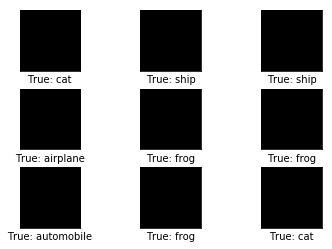

In [14]:
images = images_test[0:9]
cls_true = cls_test[0:9]
plot_images(images=images, cls_true=cls_true, smooth=False)

Here we gather information about the dimensions and specify tuples to reshape the rgb later.

In [15]:
#This gives us the number of pixels in each dimension of an image, the number of color channels,
#the number of classes, and the length of the 1D array that stores the image
from cifar10 import img_size, num_channels, num_classes, img_size_flat

#tuple with height & width of images to reshape arrays
img_shape = (img_size, img_size)

#tuple with height, width, & depth of images to reshape arrays
img_shape_full = (img_size, img_size, 1)

I'll be using a sequential model, which means that allows for layers to be added one after another.

In [16]:
# Start construction of the Keras Sequential model.
model = Sequential()

# Add an input layer
model.add(InputLayer(input_shape=(img_size_flat,)))

# The input is a flattened array with 3072 elements, but the convolutional layers expect images with shape (32, 32, 1)
model.add(Reshape(img_shape_full))

# First convolutional layer with with kernel size 6, 12 filters, ReLu activation function, and singular strides
model.add(Conv2D(kernel_size=6, strides=1, filters=12, padding='same', activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# First convolutional layer with with kernel size 6, 24 filters, ReLu activation function, and singular strides
model.add(Conv2D(kernel_size=6, strides=1, filters=24, padding='same', activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# First convolutional layer with with kernel size 6, 48 filters, ReLu activation function, and singular strides
model.add(Conv2D(kernel_size=6, strides=1, filters=48, padding='same', activation='relu', name='layer_conv3'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# First fully-connected dense layer with ReLU-activation.
model.add(Dense(128, activation='relu'))

# Second fully-connected dense layer with ReLu-activation.
model.add(Dense(128, activation='relu'))

# Last fully-connected dense layer with softmax-activation for classification.
model.add(Dense(num_classes, activation='softmax'))

We've defined the 3 layer CNN and now needs to be compiled by adding a loss-function, optimizer and performance metrics.

Here we use the `categorical_crossentropy` loss function since we have multiple classes.

In [17]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'optimizer' is not defined

Here we set the learning rate.

In [ ]:
from tensorflow.python.keras.optimizers import Adam
optimizer = Adam(lr=1e-3)

Now we have to train the model.

In [ ]:
model.fit(x=x_train, y=y_train, epochs=1, batch_size=128)

Here we test our model on the test data.

In [ ]:
result = model.evaluate(x=x_test, y=y_test)

This is the loss and accuracy.

In [262]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.049254341407306494
acc 0.9849


### Prediction

We can also predict the classification for new images. We will just use some images from the test-set.

In [39]:
images = data.x_test[0:9]

These are the true class-number for those images. This is only used when plotting the images.

In [40]:
cls_true = data.y_test_cls[0:9]

Get the predicted classes as One-Hot encoded arrays.

In [41]:
y_pred = model.predict(x=images)

Get the predicted classes as integers.

In [42]:
cls_pred = np.argmax(y_pred, axis=1)

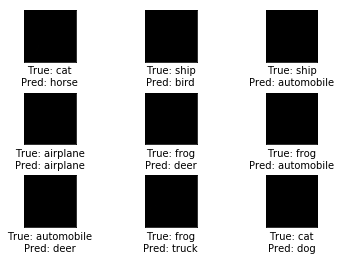

In [263]:
plot_images(images=images, cls_true=cls_true, cls_pred=cls_pred)

### Examples of Mis-Classified Images

We can plot some examples of mis-classified images from the test-set.

First we get the predicted classes for all the images in the test-set:

In [44]:
y_pred = model.predict(x=data.x_test)

Then we convert the predicted class-numbers from One-Hot encoded arrays to integers.

In [45]:
cls_pred = np.argmax(y_pred, axis=1)

Plot some of the mis-classified images.

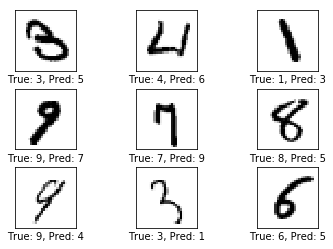

In [46]:
plot_example_errors(cls_pred)

## Save & Load Model

NOTE: You need to install `h5py` for this to work!

Tutorial #04 was about saving and restoring the weights of a model using native TensorFlow code. It was an absolutely horrible API! Fortunately, Keras makes this very easy.

This is the file-path where we want to save the Keras model.

In [58]:
path_model = 'model.keras'

Saving a Keras model with the trained weights is then just a single function call, as it should be.

In [59]:
model2.save(path_model)

Delete the model from memory so we are sure it is no longer used.

In [60]:
del model2

We need to import this Keras function for loading the model.

In [61]:
from tensorflow.python.keras.models import load_model

Loading the model is then just a single function-call, as it should be.

In [62]:
model3 = load_model(path_model)

We can then use the model again e.g. to make predictions. We get the first 9 images from the test-set and their true class-numbers.

In [63]:
images = data.x_test[0:9]

In [64]:
cls_true = data.y_test_cls[0:9]

We then use the restored model to predict the class-numbers for those images.

In [65]:
y_pred = model3.predict(x=images)

Get the class-numbers as integers.

In [66]:
cls_pred = np.argmax(y_pred, axis=1)

Plot the images with their true and predicted class-numbers.

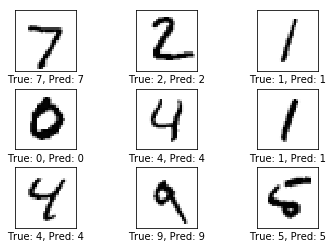

In [67]:
plot_images(images=images,
            cls_pred=cls_pred,
            cls_true=cls_true)

## Visualization of Layer Weights and Outputs

### Helper-function for plotting convolutional weights

In [68]:
def plot_conv_weights(weights, input_channel=0):
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(weights)
    w_max = np.max(weights)

    # Number of filters used in the conv. layer.
    num_filters = weights.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = weights[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Get Layers

Keras has a simple way of listing the layers in the model.

In [69]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 7, 7, 36)          32436     
__________

We count the indices to get the layers we want.

The input-layer has index 0.

In [70]:
layer_input = model3.layers[0]

The first convolutional layer has index 2.

In [71]:
max_pooling2d_2 = model3.layers[2]
max_pooling2d_2

The second convolutional layer has index 4.

In [72]:
max_pooling2d_3 = model3.layers[4]

### Convolutional Weights

Now that we have the layers we can easily get their weights.

In [73]:
weights_max1 = max_pooling2d_2.get_weights()[0]

This gives us a 4-rank tensor.

In [74]:
weights_max1.shape

(5, 5, 1, 16)

Plot the weights using the helper-function from above.

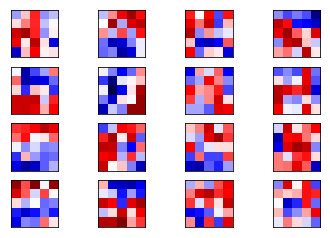

In [75]:
plot_conv_weights(weights=weights_max1, input_channel=0)

We can also get the weights for the second convolutional layer and plot them.

In [76]:
weights_max2 = max_pooling2d_3.get_weights()[0]

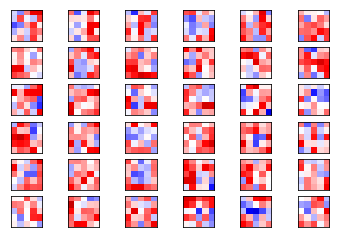

In [77]:
plot_conv_weights(weights=weights_max2, input_channel=0)

### Helper-function for plotting the output of a convolutional layer

In [78]:
def plot_conv_output(values):
    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Input Image

Helper-function for plotting a single image.

In [266]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape), interpolation='nearest', cmap='binary')
    plt.show()

Plot an image from the test-set which will be used as an example below.

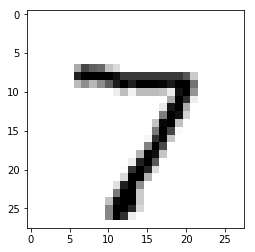

In [80]:
image1 = data.x_test[0]
plot_image(image1)

### Output of Convolutional Layer - Method 1

There are different ways of getting the output of a layer in a Keras model. This method uses a so-called K-function which turns a part of the Keras model into a function.

In [81]:
from tensorflow.python.keras import backend as K

In [264]:
output_conv1 = K.function(inputs=[layer_input.input], outputs=[layer_conv1.output])

NameError: name 'layer_conv1' is not defined

We can then call this function with the input image. Note that the image is wrapped in two lists because the function expects an array of that dimensionality. Likewise, the function returns an array with one more dimensionality than we want so we just take the first element.

In [ ]:
layer_output1 = output_conv1([[image1]])[0]
layer_output1.shape

We can then plot the output of all 16 channels of the convolutional layer.

In [ ]:
plot_conv_output(values=layer_output1)

### Output of Convolutional Layer - Method 2

Keras also has another method for getting the output of a layer inside the model. This creates another Functional Model using the same input as the original model, but the output is now taken from the convolutional layer that we are interested in.

In [265]:
output_conv2 = Model(inputs=layer_input.input, outputs=layer_conv2.output)

NameError: name 'layer_conv2' is not defined

This creates a new model-object where we can call the typical Keras functions. To get the output of the convoloutional layer we call the `predict()` function with the input image.

In [ ]:
layer_output2 = output_conv2.predict(np.array([image1]))
layer_output2.shape

We can then plot the images for all 36 channels.

In [ ]:
plot_conv_output(values=layer_output2)